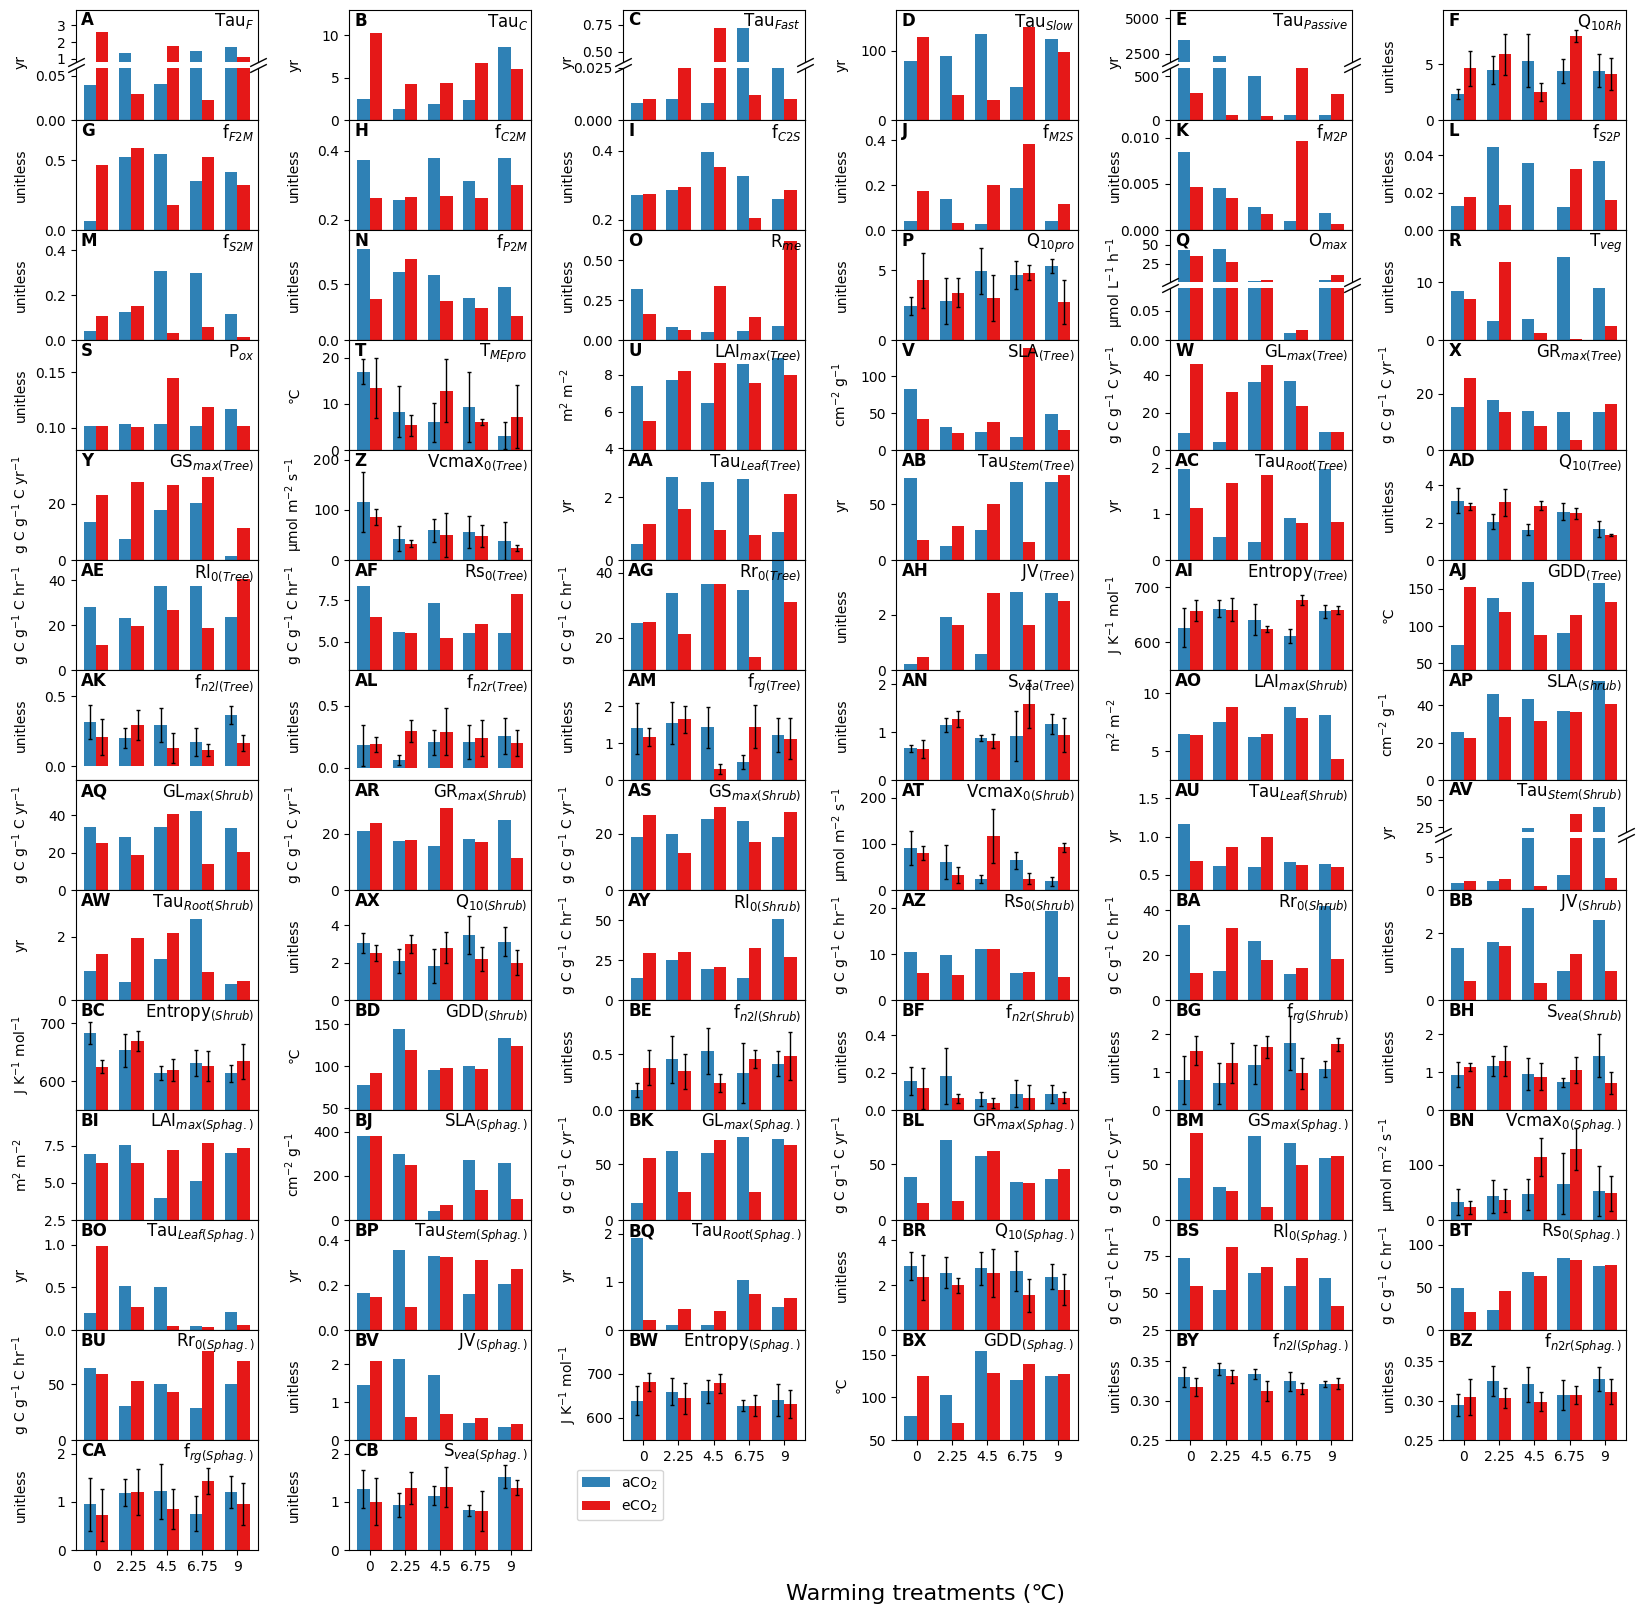

In [2]:
import pandas as pd
import numpy as np
import string
import pickle

def get_subplot_label(n):
    alphabet = string.ascii_lowercase
    label = ''
    while True:
        n, r = divmod(n, 26)
        label = alphabet[r] + label
        if n == 0:
            break
        n -= 1  # Excel-like offset
    return f"{label}"

dict_params = {
    'Tau_F'  : ['Tau_F'], 'Tau_C': ['Tau_C'], 'Tau_Micro': ['Tau_Micro'], 'Tau_SlowSOM':['Tau_SlowSOM'], 'Tau_Passive': ['Tau_Passive'], 
    'Q10rh'  : ['Q10rh_4', 'Q10rh_5', 'Q10rh_6', 'Q10rh_6', 'Q10rh_8'],
    'f_F2M'  : ['f_F2M'], 'f_C2M': ['f_C2M'], 'f_C2S': ['f_C2S'], 'f_M2S': ['f_M2S'], 'f_M2P': ['f_M2P'], 'f_S2P': ['f_S2P'], 'f_S2M': ['f_S2M'], 'f_P2M': ['f_P2M'],
    'r_me'   : ['r_me'],  'Q10pro': ['Q10pro_4', 'Q10pro_5', 'Q10pro_6', 'Q10pro_6', 'Q10pro_8'], 'Omax': ['Omax'], #'CH4_thre':['CH4_thre'], 
    'Tveg':['Tveg'], 'pox': ['pox'],
    'Tpro_me': ['Tpro_me_4', 'Tpro_me_5', 'Tpro_me_6', 'Tpro_me_6', 'Tpro_me_8'],
    # Tree
    'LAImax_Tree': ['LAImax_Tree'], #'SapS_Tree':['SapS_Tree'], 
    'SLAx_Tree': ['SLAx_Tree'], 'GLmax_Tree':['GLmax_Tree'], 'GRmax_Tree':['GRmax_Tree'], 'Gsmax_Tree':['Gsmax_Tree'], 
    'Vcmax0_Tree': ['Vcmax0_4_Tree', 'Vcmax0_1_Tree', 'Vcmax0_6_Tree', 'Vcmax0_1_Tree','Vcmax0_1_Tree'], 'Tau_Leaf_Tree': ['Tau_Leaf_Tree'], 'Tau_Stem_Tree': ['Tau_Stem_Tree'], 'Tau_Root_Tree': ['Tau_Root_Tree'],
    'Q10_Tree': ['Q10_4_Tree','Q10_1_Tree','Q10_6_Tree', 'Q10_1_Tree', 'Q10_1_Tree'], 'Rl0_Tree': ['Rl0_Tree'], 'Rs0_Tree': ['Rs0_Tree'], 'Rr0_Tree': ['Rr0_Tree'], 'JV_Tree': ['JV_Tree'],
    'Entrpy_Tree':['Entrpy_4_Tree', 'Entrpy_1_Tree','Entrpy_6_Tree', 'Entrpy_1_Tree', 'Entrpy_1_Tree'], 'gddonset_Tree': ['gddonset_Tree'], 
    'fn2l_Tree': ['fn2l_4_Tree','fn2l_5_Tree', 'fn2l_6_Tree', 'fn2l_7_Tree', 'fn2l_8_Tree'], 'fn2r_Tree': ['fn2r_4_Tree', 'fn2r_5_Tree', 'fn2r_6_Tree', 'fn2r_7_Tree', 'fn2r_8_Tree'], 
    'f_rg_Tree': ['f_rg_4_Tree', 'f_rg_1_Tree', 'f_rg_6_Tree','f_rg_1_Tree','f_rg_1_Tree'], 's_vea_Tree': ['s_vea_4_Tree', 's_vea_1_Tree', 's_vea_6_Tree', 's_vea_1_Tree', 's_vea_1_Tree'], 
    # 's_npp_Tree': ['s_npp_4_Tree', 's_npp_5_Tree', 's_npp_6_Tree', 's_npp_7_Tree', 's_npp_8_Tree'],
    # Shrub
    'LAImax_Shrub': ['LAImax_Shrub'], #'SapS_Shrub': ['SapS_Shrub'], 
    'SLAx_Shrub': ['SLAx_Shrub'], 'GLmax_Shrub': ['GLmax_Shrub'], 'GRmax_Shrub': ['GRmax_Shrub'], 'Gsmax_Shrub': ['Gsmax_Shrub'], 
    'Vcmax0_Shrub': ['Vcmax0_4_Shrub', 'Vcmax0_5_Shrub', 'Vcmax0_6_Shrub', 'Vcmax0_6_Shrub', 'Vcmax0_8_Shrub'], 'Tau_Leaf_Shrub': ['Tau_Leaf_Shrub'], 'Tau_Stem_Shrub': ['Tau_Stem_Shrub'], 'Tau_Root_Shrub': ['Tau_Root_Shrub'], 
    'Q10_Shrub': ['Q10_4_Shrub', 'Q10_5_Shrub', 'Q10_6_Shrub', 'Q10_6_Shrub', 'Q10_8_Shrub'], 'Rl0_Shrub': ['Rl0_Shrub'], 'Rs0_Shrub': ['Rs0_Shrub'], 'Rr0_Shrub': ['Rr0_Shrub'], 'JV_Shrub': ['JV_Shrub'],
    'Entrpy_Shrub': ['Entrpy_4_Shrub', 'Entrpy_5_Shrub', 'Entrpy_6_Shrub', 'Entrpy_6_Shrub', 'Entrpy_8_Shrub',], 'gddonset_Shrub': ['gddonset_Shrub'], 
    'fn2l_Shrub': ['fn2l_4_Shrub', 'fn2l_5_Shrub', 'fn2l_6_Shrub', 'fn2l_7_Shrub', 'fn2l_8_Shrub'], 'fn2r_Shrub': ['fn2r_4_Shrub', 'fn2r_5_Shrub', 'fn2r_6_Shrub', 'fn2r_7_Shrub', 'fn2r_8_Shrub'],
    'f_rg_Shrub': ['f_rg_4_Shrub', 'f_rg_5_Shrub', 'f_rg_6_Shrub', 'f_rg_6_Shrub', 'f_rg_8_Shrub'], 's_vea_Shrub': ['s_vea_4_Shrub', 's_vea_5_Shrub', 's_vea_6_Shrub', 's_vea_6_Shrub', 's_vea_8_Shrub'],
    # 's_npp_Shrub': ['s_npp_4_Shrub', 's_npp_5_Shrub', 's_npp_6_Shrub', 's_npp_7_Shrub', 's_npp_8_Shrub'],
    # Sphagnum
    'LAImax_Sphagnum': ['LAImax_Sphagnum'], #'SapS_Sphagnum': ['SapS_Sphagnum'], 
    'SLAx_Sphagnum': ['SLAx_Sphagnum'], 'GLmax_Sphagnum': ['GLmax_Sphagnum'], 'GRmax_Sphagnum': ['GRmax_Sphagnum'], 'Gsmax_Sphagnum': ['Gsmax_Sphagnum'], 
    'Vcmax0_Sphagnum': ['Vcmax0_4_Sphagnum', 'Vcmax0_5_Sphagnum', 'Vcmax0_6_Sphagnum', 'Vcmax0_6_Sphagnum', 'Vcmax0_8_Sphagnum'], 'Tau_Leaf_Sphagnum': ['Tau_Leaf_Sphagnum'], 'Tau_Stem_Sphagnum': ['Tau_Stem_Sphagnum'], 'Tau_Root_Sphagnum': ['Tau_Root_Sphagnum'], 
    'Q10_Sphagnum': ['Q10_4_Sphagnum', 'Q10_5_Sphagnum', 'Q10_6_Sphagnum', 'Q10_6_Sphagnum', 'Q10_8_Sphagnum'], 'Rl0_Sphagnum': ['Rl0_Sphagnum'], 'Rs0_Sphagnum': ['Rs0_Sphagnum'], 'Rr0_Sphagnum': ['Rr0_Sphagnum'], 'JV_Sphagnum': ['JV_Sphagnum'],
    'Entrpy_Sphagnum': ['Entrpy_4_Sphagnum', 'Entrpy_5_Sphagnum', 'Entrpy_6_Sphagnum', 'Entrpy_6_Sphagnum', 'Entrpy_8_Sphagnum'], 'gddonset_Sphagnum': ['gddonset_Sphagnum'], 
    'fn2l_Sphagnum': ['fn2l_4_Sphagnum', 'fn2l_5_Sphagnum', 'fn2l_6_Sphagnum', 'fn2l_7_Sphagnum', 'fn2l_8_Sphagnum'], 'fn2r_Sphagnum': ['fn2r_4_Sphagnum', 'fn2r_5_Sphagnum', 'fn2r_6_Sphagnum', 'fn2r_7_Sphagnum', 'fn2r_8_Sphagnum'],
    'f_rg_Sphagnum': ['f_rg_4_Sphagnum', 'f_rg_5_Sphagnum', 'f_rg_6_Sphagnum', 'f_rg_6_Sphagnum', 'f_rg_8_Sphagnum'], 's_vea_Sphagnum': ['s_vea_4_Sphagnum', 's_vea_5_Sphagnum', 's_vea_6_Sphagnum', 's_vea_6_Sphagnum', 's_vea_8_Sphagnum'],
    # 's_npp_Sphagnum': ['s_npp_4_Sphagnum', 's_npp_5_Sphagnum', 's_npp_6_Sphagnum', 's_npp_7_Sphagnum', 's_npp_8_Sphagnum']
}

dict_subtitles = {
    'Tau_F'  : 'Tau$_F$',     'Tau_C' : 'Tau$_C$',     'Tau_Micro': 'Tau$_{Fast}$', 'Tau_SlowSOM':'Tau$_{Slow}$', 'Tau_Passive': 'Tau$_{Passive}$', 
    'Q10rh'  : 'Q$_{10Rh}$',  'f_F2M' : 'f$_{F2M}$',   'f_C2M'    : 'f$_{C2M}$',     'f_C2S'      : 'f$_{C2S}$',      'f_M2S'      :'f$_{M2S}$', 
    'f_M2P'  : 'f$_{M2P}$',   'f_S2P' : 'f$_{S2P}$',   'f_S2M'    : 'f$_{S2M}$',     'f_P2M'      : 'f$_{P2M}$',
    'r_me'   : 'R$_{me}$',    'Q10pro': 'Q$_{10pro}$', 'Omax'     : 'O$_{max}$',     'CH4_thre'   :'CH4$_{thre}$',    'Tveg':'T$_{veg}$', 'pox': 'P$_{ox}$',
    'Tpro_me': 'T$_{MEpro}$',
    # Tree
    'LAImax_Tree': 'LAI$_{max (Tree)}$', 'SapS_Tree':'SapS$_{(Tree)}$', 'SLAx_Tree': 'SLA$_{(Tree)}$', 'GLmax_Tree':'GL$_{max (Tree)}$', 'GRmax_Tree': 'GR$_{max (Tree)}$', 'Gsmax_Tree':'GS$_{max (Tree)}$', 
    'Vcmax0_Tree': 'Vcmax$_{0 (Tree)}$', 'Tau_Leaf_Tree': 'Tau$_{Leaf (Tree)}$', 'Tau_Stem_Tree': 'Tau$_{Stem (Tree)}$', 'Tau_Root_Tree': 'Tau$_{Root (Tree)}$',
    'Q10_Tree'   : 'Q$_{10 (Tree)}$',    'Rl0_Tree': 'Rl$_{0 (Tree)}$', 'Rs0_Tree': 'Rs$_{0 (Tree)}$', 'Rr0_Tree': 'Rr$_{0 (Tree)}$', 'JV_Tree': 'JV$_{(Tree)}$',
    'Entrpy_Tree': 'Entropy$_{ (Tree)}$', 'gddonset_Tree': 'GDD$_{ (Tree)}$', 
    'fn2l_Tree'  : 'f$_{n2l (Tree)}$',   'fn2r_Tree': 'f$_{n2r (Tree)}$', 
    'f_rg_Tree'  : 'f$_{rg (Tree)}$',    's_vea_Tree': 'S$_{vea (Tree)}$', 
    # 's_npp_Tree': ['s_npp_4_Tree', 's_npp_5_Tree', 's_npp_6_Tree', 's_npp_7_Tree', 's_npp_8_Tree'],
    # Shrub
    'LAImax_Shrub': 'LAI$_{max (Shrub)}$', 'SapS_Shrub': 'SapS$_{ (Shrub)}$', 'SLAx_Shrub': 'SLA$_{ (Shrub)}$', 'GLmax_Shrub': 'GL$_{max (Shrub)}$', 'GRmax_Shrub': 'GR$_{max (Shrub)}$', 'Gsmax_Shrub': 'GS$_{max (Shrub)}$', 
    'Vcmax0_Shrub': 'Vcmax$_{0 (Shrub)}$', 'Tau_Leaf_Shrub': 'Tau$_{Leaf (Shrub)}$', 'Tau_Stem_Shrub': 'Tau$_{Stem (Shrub)}$', 'Tau_Root_Shrub': 'Tau$_{Root (Shrub)}$', 
    'Q10_Shrub'   : 'Q$_{10 (Shrub)}$',    'Rl0_Shrub': 'Rl$_{0 (Shrub)}$', 'Rs0_Shrub': 'Rs$_{0 (Shrub)}$', 'Rr0_Shrub': 'Rr$_{0 (Shrub)}$', 'JV_Shrub': 'JV$_{ (Shrub)}$',
    'Entrpy_Shrub': 'Entropy$_{ (Shrub)}$', 'gddonset_Shrub': 'GDD$_{ (Shrub)}$', 
    'fn2l_Shrub'  : 'f$_{n2l (Shrub)}$',  'fn2r_Shrub':  'f$_{n2r (Shrub)}$',
    'f_rg_Shrub'  : 'f$_{rg (Shrub)}$',   's_vea_Shrub': 'S$_{vea (Shrub)}$',
    # 's_npp_Shrub': ['s_npp_4_Shrub', 's_npp_5_Shrub', 's_npp_6_Shrub', 's_npp_7_Shrub', 's_npp_8_Shrub'],
    # Sphagnum
    'LAImax_Sphagnum': 'LAI$_{max (Sphag.)}$', 'SapS_Sphagnum': 'SapS$_{ (Sphag.)}$', 'SLAx_Sphagnum': 'SLA$_{ (Sphag.)}$', 'GLmax_Sphagnum': 'GL$_{max (Sphag.)}$', 'GRmax_Sphagnum': 'GR$_{max (Sphag.)}$', 'Gsmax_Sphagnum': 'GS$_{max (Sphag.)}$', 
    'Vcmax0_Sphagnum': 'Vcmax$_{0 (Sphag.)}$', 'Tau_Leaf_Sphagnum': 'Tau$_{Leaf (Sphag.)}$', 'Tau_Stem_Sphagnum': 'Tau$_{Stem (Sphag.)}$', 'Tau_Root_Sphagnum': 'Tau$_{Root (Sphag.)}$', 
    'Q10_Sphagnum'   : 'Q$_{10 (Sphag.)}$', 'Rl0_Sphagnum': 'Rl$_{0 (Sphag.)}$', 'Rs0_Sphagnum': 'Rs$_{0 (Sphag.)}$', 'Rr0_Sphagnum': 'Rr$_{0 (Sphag.)}$', 'JV_Sphagnum': 'JV$_{ (Sphag.)}$',
    'Entrpy_Sphagnum': 'Entropy$_{ (Sphag.)}$', 'gddonset_Sphagnum': 'GDD$_{ (Sphag.)}$', 
    'fn2l_Sphagnum': 'f$_{n2l (Sphag.)}$',  'fn2r_Sphagnum': 'f$_{n2r (Sphag.)}$',
    'f_rg_Sphagnum': 'f$_{rg (Sphag.)}$',  's_vea_Sphagnum': 'S$_{vea (Sphag.)}$', 
    # 's_npp_Sphagnum': ['s_npp_4_Sphagnum', 's_npp_5_Sphagnum', 's_npp_6_Sphagnum', 's_npp_7_Sphagnum', 's_npp_8_Sphagnum']
}

# print(len(dict_params.keys()))
aCO2_warming_plots = ["P06", "P20", "P13", "P08", "P17"]  # Plot numbers for warming treatments
eCO2_warming_plots = ["P19", "P11", "P04", "P16", "P10"]
plot_names = ["P04", "P06", "P08", "P10", "P11", "P13", "P16", "P17", "P19", "P20"]
ls_warming = [0, 2.25, 4.5, 6.75, 9]


with open("1_params.pkl", "rb") as f:
    dict_dfs = pickle.load(f)

def compute_mean_std(x_vals, y_vals, warming_levels):
    """Return mean and std of y grouped by x (warming levels)"""
    means, stds = [], []
    for w in warming_levels:
        ys = [y for x, y in zip(x_vals, y_vals) if x == w]
        means.append(np.nanmean(ys) if ys else np.nan)
        stds.append(np.nanstd(ys) if ys else np.nan)
    return np.array(means), np.array(stds)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

ls_ylim = [
    ((0.79,3.9),(0,0.059)), (0, 13), ((0.4, 0.89), (0, 0.025)), (0,159), ((1900, 3799), (0, 599)), (0,9.9), (0, 0.79),
    (0.17,0.49), (0.17,0.49), (0,0.49), (0, 0.0119), (0, 0.059), (0,0.49), (0,0.99),
    (0,0.69), (0,7.9), ((1,69), (0,0.089)), #(0,1799), 
    (0, 19), (0.08, 0.13), (0,23.9),
    (3.9,9.9), #(0.21,0.59), 
    (0,149), (0,59), (0,39), (0,39), (0,219),
    (0,3.5), (0,99), (0,2.39), (0,5.9), (0,49),(3.3,9.9), (10,44),
    (0,3.99), (550,749), (41,189), (-0.1,0.69), (-0.1,0.79), (0, 2.99), (0,2.3),
    
    (2.5, 11.99), #(0.29,0.59), 
    (0, 59), (0,59), (0,39), (0,39), (0,199),
    (0.3,1.24), ((20,69), (0,8)), (0,3.49), (0,5.9), (0,69), (0,24), (0,49),
    
    (0,3.29), (550,740), (48,159), (0,0.99), (0,0.59), (0,2.9), (0,2.9),
    
    (2.5,9.9), #(0.4,0.59), 
    (0,499), (0,99), (0,79), (0,99), (0,199),
    
    (0,1.29), (0,0.49), (0, 2.29), (0, 4.9), (25,99), (0,99), (0,99),
    (0,2.9), (550,799), (50,179), (0.25,0.39), (0.25,0.39), (0,2.29), (0,2.29)
]

dict_ylim = {
    'Tau_F'  : ((0.79,3.9),(0,0.059)), 'Tau_C' :(0, 13), 'Tau_Micro': ((0.4, 0.89), (0, 0.025)), 'Tau_SlowSOM':(0,159), 'Tau_Passive':((1900, 5599), (0, 599)), 
    'Q10rh'  : (0,9.9), 'f_F2M' : (0, 0.79),
    'f_C2M'  : (0.17,0.49), 'f_C2S'      : (0.17,0.49), 'f_M2S'      :(0,0.49), 'f_M2P'  : (0, 0.0119), 'f_S2P' : (0, 0.059), 'f_S2M'    :(0,0.49), 'f_P2M'      : (0,0.99),
    'r_me'   : (0,0.69), 'Q10pro': (0,7.9), 'Omax'     :((1,69), (0,0.089)), #'CH4_thre'   :(0,1799), 
    'Tveg'   : (0, 19), 'pox': (0.08, 0.179), 'Tpro_me':(0,23.9),
    'LAImax_Tree':(3.9,9.9), #'SapS_Tree':(0.21,0.59), 
    'SLAx_Tree': (0,149), 'GLmax_Tree':(0,59), 'GRmax_Tree':(0,39), 'Gsmax_Tree':(0,39), 'Vcmax0_Tree':(0,219),
    'Tau_Leaf_Tree':(0,3.5), 'Tau_Stem_Tree':(0,99), 'Tau_Root_Tree': (0,2.39), 'Q10_Tree'   :(0,5.9), 'Rl0_Tree':(0,49),'Rs0_Tree':(3.3,9.9), 'Rr0_Tree':(10,44),
    'JV_Tree':(0,3.99), 'Entrpy_Tree':(550,749), 'gddonset_Tree': (41,189), 'fn2l_Tree'  : (-0.1,0.69), 'fn2r_Tree':(-0.1,0.79), 'f_rg_Tree'  :(0, 2.99), 's_vea_Tree':(0,2.3),
    
    'LAImax_Shrub': (2.5, 11.99), #'SapS_Shrub':(0.29,0.59), 
    'SLAx_Shrub':(0, 59), 'GLmax_Shrub': (0,59), 'GRmax_Shrub': (0,39), 'Gsmax_Shrub': (0,39), 'Vcmax0_Shrub':(0,239),
    'Tau_Leaf_Shrub':(0.3,1.74), 'Tau_Stem_Shrub': ((20,69), (0,8)), 'Tau_Root_Shrub': (0,3.49), 'Q10_Shrub'   :(0,5.9), 'Rl0_Shrub':(0,69), 'Rs0_Shrub': (0,24), 'Rr0_Shrub': (0,49),
    
    'JV_Shrub': (0,3.29), 'Entrpy_Shrub':(550,740), 'gddonset_Shrub': (48,179), 'fn2l_Shrub'  : (0,0.99), 'fn2r_Shrub': (0,0.59), 'f_rg_Shrub'  :(0,2.9), 's_vea_Shrub':(0,2.9),
    
    'LAImax_Sphagnum': (2.5,9.9), #'SapS_Sphagnum': (0.4,0.59), 
    'SLAx_Sphagnum': (0,499), 'GLmax_Sphagnum':(0,99), 'GRmax_Sphagnum': (0,99), 'Gsmax_Sphagnum':(0,99), 'Vcmax0_Sphagnum':(0,199),
    
    'Tau_Leaf_Sphagnum': (0,1.29), 'Tau_Stem_Sphagnum':(0,0.49), 'Tau_Root_Sphagnum': (0, 2.29), 'Q10_Sphagnum'   :(0, 4.9), 'Rl0_Sphagnum': (25,99), 'Rs0_Sphagnum':(0,129), 'Rr0_Sphagnum': (0,99),
    'JV_Sphagnum':(0,2.9), 'Entrpy_Sphagnum':(550,799), 'gddonset_Sphagnum':(50,179), 'fn2l_Sphagnum':(0.25,0.39), 'fn2r_Sphagnum': (0.25,0.39), 'f_rg_Sphagnum': (0,2.29), 's_vea_Sphagnum': (0,2.29)
}

dict_unit = {
    'Tau_F'  : 'yr', 'Tau_C' : 'yr', 'Tau_Micro': 'yr', 'Tau_SlowSOM': 'yr', 'Tau_Passive': 'yr', 
    'Q10rh'  : 'unitless', 'f_F2M' : 'unitless',
    'f_C2M'  : 'unitless', 'f_C2S'      : 'unitless', 'f_M2S'      :'unitless', 'f_M2P'  : 'unitless', 'f_S2P' : 'unitless', 'f_S2M'    :'unitless', 'f_P2M'      : 'unitless',
    'r_me'   : 'unitless', 'Q10pro': 'unitless', 'Omax'     :'μmol L$^{-1}$ h$^{-1}$', #'CH4_thre'   :(0,1799), 
    'Tveg'   : 'unitless', 'pox': 'unitless', 'Tpro_me': '℃',

    'LAImax_Tree'  : 'm$^{2}$ m$^{-2}$', #'SapS_Tree':(0.21,0.59), 
    'SLAx_Tree'    : 'cm$^{-2}$ g$^{-1}$', 'GLmax_Tree': 'g C g$^{-1}$ C yr$^{-1}$', 'GRmax_Tree':'g C g$^{-1}$ C yr$^{-1}$', 'Gsmax_Tree':'g C g$^{-1}$ C yr$^{-1}$', 'Vcmax0_Tree': 'μmol m$^{-2}$ s$^{-1}$',
    'Tau_Leaf_Tree': 'yr', 'Tau_Stem_Tree':'yr', 'Tau_Root_Tree': 'yr', 'Q10_Tree'   :'unitless', 'Rl0_Tree':'g C g$^{-1}$ C hr$^{-1}$','Rs0_Tree':'g C g$^{-1}$ C hr$^{-1}$', 'Rr0_Tree':'g C g$^{-1}$ C hr$^{-1}$',
    'JV_Tree':'unitless', 'Entrpy_Tree': 'J K$^{-1}$ mol$^{-1}$', 'gddonset_Tree': '℃', 'fn2l_Tree'  : 'unitless', 'fn2r_Tree':'unitless', 'f_rg_Tree'  :'unitless', 's_vea_Tree':'unitless',
    
    'LAImax_Shrub': 'm$^{2}$ m$^{-2}$', #'SapS_Shrub':(0.29,0.59), 
    'SLAx_Shrub':'cm$^{-2}$ g$^{-1}$', 'GLmax_Shrub': 'g C g$^{-1}$ C yr$^{-1}$', 'GRmax_Shrub': 'g C g$^{-1}$ C yr$^{-1}$', 'Gsmax_Shrub': 'g C g$^{-1}$ C yr$^{-1}$', 'Vcmax0_Shrub':'μmol m$^{-2}$ s$^{-1}$',
    'Tau_Leaf_Shrub':'yr', 'Tau_Stem_Shrub': 'yr', 'Tau_Root_Shrub': 'yr', 'Q10_Shrub'   :'unitless', 'Rl0_Shrub':'g C g$^{-1}$ C hr$^{-1}$', 'Rs0_Shrub': 'g C g$^{-1}$ C hr$^{-1}$', 'Rr0_Shrub': 'g C g$^{-1}$ C hr$^{-1}$',
    'JV_Shrub': 'unitless', 'Entrpy_Shrub':'J K$^{-1}$ mol$^{-1}$', 'gddonset_Shrub': '℃', 'fn2l_Shrub'  : 'unitless', 'fn2r_Shrub': 'unitless', 'f_rg_Shrub'  :'unitless', 's_vea_Shrub':'unitless',
    
    'LAImax_Sphagnum': 'm$^{2}$ m$^{-2}$', #'SapS_Sphagnum': (0.4,0.59), 
    'SLAx_Sphagnum': 'cm$^{-2}$ g$^{-1}$', 'GLmax_Sphagnum':'g C g$^{-1}$ C yr$^{-1}$', 'GRmax_Sphagnum': 'g C g$^{-1}$ C yr$^{-1}$', 'Gsmax_Sphagnum':'g C g$^{-1}$ C yr$^{-1}$', 'Vcmax0_Sphagnum':'μmol m$^{-2}$ s$^{-1}$',
    'Tau_Leaf_Sphagnum': 'yr', 'Tau_Stem_Sphagnum':'yr', 'Tau_Root_Sphagnum':'yr', 'Q10_Sphagnum'   :'unitless', 'Rl0_Sphagnum': 'g C g$^{-1}$ C hr$^{-1}$', 'Rs0_Sphagnum':'g C g$^{-1}$ C hr$^{-1}$', 'Rr0_Sphagnum': 'g C g$^{-1}$ C hr$^{-1}$',
    'JV_Sphagnum':'unitless', 'Entrpy_Sphagnum':'J K$^{-1}$ mol$^{-1}$', 'gddonset_Sphagnum':'℃', 'fn2l_Sphagnum':'unitless', 'fn2r_Sphagnum': 'unitless', 'f_rg_Sphagnum': 'unitless', 's_vea_Sphagnum': 'unitless'
}


nrow, ncol = 14, 6
fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(nrow, ncol, figure=fig)

# fig, axes = plt.subplots(nrow, ncol, figsize=(20, 20), sharex=True)
ls_vars = list(dict_params.keys())
idx_var = 0
COLORS = {
    'ambient': "#2F81B5",# '#145390',# '#004697', # '#4A8CC3', # '#EAB080', # '#2F81B5',
    'elevated': "#E51818" # '#E51818' # '#E37939', # '#7C9D97'# ''
}

for irow in range(nrow):
    for icol in range(ncol):
        if idx_var >= len(ls_vars):
            # axes[irow, icol].axis("off")
            continue
        ls_ax = []
        # if irow == 0 and icol == 2:
        # print(ls_ylim[idx_var], len(ls_ylim[idx_var][0]))
        item = dict_ylim[ls_vars[idx_var]]
        if isinstance(item, tuple) and len(item) == 2 and all(isinstance(sub, tuple) for sub in item):
            inner_gs = gs[irow, icol].subgridspec(2, 1, height_ratios=[1, 1], hspace=0.1)
            ax_top = fig.add_subplot(inner_gs[0])
            ax_bottom = fig.add_subplot(inner_gs[1])
            ax_top.spines.bottom.set_visible(False)
            ax_bottom.spines.top.set_visible(False)
            # ax_top.xaxis.tick_top()
            # ax_top.tick_params(axis='x',length=0)
            ax_top.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
            d = 0.5  # proportion of vertical to horizontal extent of the slanted line
            kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                        linestyle="none", color='k', mec='k', mew=1, clip_on=False)
            ax_top.plot([0, 1], [0, 0], transform=ax_top.transAxes, **kwargs)
            ax_bottom.plot([0, 1], [1, 1], transform=ax_bottom.transAxes, **kwargs)
            # set ylim
            ax_top.set_ylim(item[0])
            ax_bottom.set_ylim(item[1])
            ls_ax = [ax_top, ax_bottom]
            ax_top.text(-0.3, 0, dict_unit[ls_vars[idx_var]], va='center', ha='center', transform=ax_top.transAxes, fontsize=10, rotation=90)
        else:
            ax_ax = fig.add_subplot(gs[irow, icol])
            ls_ax = [ax_ax]
            ax_ax.set_ylim(item)
            ax_ax.text(-0.3, 0.5, dict_unit[ls_vars[idx_var]], va='center', ha='center', transform=ax_ax.transAxes, fontsize=10, rotation=90)

        ls_ivar = dict_params[ls_vars[idx_var]]
        idx_var += 1

        ls_x_aco2, ls_y_aco2 = [], []
        ls_x_eco2, ls_y_eco2 = [], []

        for idx_warming, (iplot_aco2, iplot_eco2) in enumerate(zip(aCO2_warming_plots, eCO2_warming_plots)):
            iwarm = ls_warming[idx_warming]
            df_aco2 = dict_dfs[iplot_aco2]
            df_eco2 = dict_dfs[iplot_eco2]

            for ivar in ls_ivar:
                ls_y_aco2.append(df_aco2[ivar])
                ls_y_eco2.append(df_eco2[ivar])
                ls_x_aco2.append(iwarm)
                ls_x_eco2.append(iwarm)

        mean_a, std_a = compute_mean_std(ls_x_aco2, ls_y_aco2, ls_warming)
        mean_e, std_e = compute_mean_std(ls_x_eco2, ls_y_eco2, ls_warming)



        x = np.arange(len(ls_warming))
        bar_width = 0.35

        for idx_ax, ax in enumerate(ls_ax):
            bars1 = ax.bar(x - bar_width/2, mean_a, width=bar_width, color=COLORS['ambient'], label='aCO$_2$')
            bars2 = ax.bar(x + bar_width/2, mean_e, width=bar_width, color=COLORS['elevated'], label='eCO$_2$')

            for i in range(len(x)):
                if std_a[i] > 0:
                    ax.errorbar(x[i] - bar_width/2, mean_a[i], yerr=std_a[i], fmt='none', color='k', capsize=1.5, elinewidth=1)
                if std_e[i] > 0:
                    ax.errorbar(x[i] + bar_width/2, mean_e[i], yerr=std_e[i], fmt='none', color='k', capsize=1.5, elinewidth=1)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=10)
        ax = ls_ax[-1]
        ax.set_xticks(x)
        ax.set_xticklabels(ls_warming, fontsize=10)
        # ax.set_title(ls_vars[idx_var - 1], fontsize=8)

            # if irow == 0 and icol == 0:
            #     ax.legend(fontsize=6)
        ax = ls_ax[0]
        label = get_subplot_label(idx_var-1)
        ax.text(0.03,0.98, label.upper(), ha="left", va="top", transform=ax.transAxes, fontsize=12, fontweight="bold")
        ax.text(0.98,0.98, dict_subtitles[ls_vars[idx_var-1]], ha="right", va="top", transform=ax.transAxes, fontsize=12)
        
ax.legend(
    loc='center left',          
    bbox_to_anchor=(1.02, 0.5), 
    borderaxespad=3           
)

fig.text(0.55, 0.085, 'Warming treatments (℃)', ha='center', fontsize=16)
plt.subplots_adjust(wspace=0.5, hspace=0)
# plt.savefig("2_results/5_figures/fig_s_parameters.pdf", dpi=300, format="pdf", bbox_inches='tight')#, transparent=True)
